In [1]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import datetime
from sklearn.preprocessing import LabelEncoder
sns.set()
pd.set_option('max_row',200)
pd.set_option('max_columns',200)

train = pd.read_csv('D:/书籍资料整理/kaggle/avazu-ctr-prediction/train.csv', nrows = 1000000)
train.head()


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


In [2]:
train['click'].value_counts()

0    839781
1    160219
Name: click, dtype: int64

id: 用户ID号<br>
click: 0/1 表示未点击/点击<br>
hour: 格式为YYMMDDHH，因此14091123表示2014年9月11日UTC时间23:00。<br>
C1: 匿名分类变量<br>
banner_pos: int型，网页上的广告位置，离散特征0,1,2,3...<br>
site_id:Site ID<br>
site_domain:Site领域<br>
site_category: 网站类别<br>
app_id: string型，用户APP的ID<br>
app_domain<br>
app_category<br>
device_id: 设备编号<br>
device_ip<br>
device_model<br>
device_type: 设备类型<br>
device_conn_type:Device接入类型<br>
C14-C21 -- anonymized categorical variables<br>

In [3]:
train.isnull().any()  #查看缺失值情况

id                  False
click               False
hour                False
C1                  False
banner_pos          False
site_id             False
site_domain         False
site_category       False
app_id              False
app_domain          False
app_category        False
device_id           False
device_ip           False
device_model        False
device_type         False
device_conn_type    False
C14                 False
C15                 False
C16                 False
C17                 False
C18                 False
C19                 False
C20                 False
C21                 False
dtype: bool

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


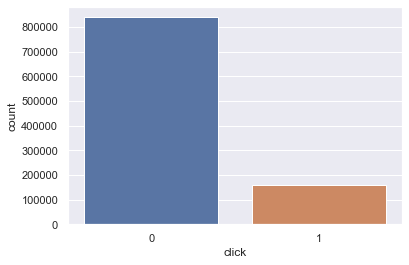

In [4]:
# train.describe()
sns.countplot(train['click'])
plt.show()


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


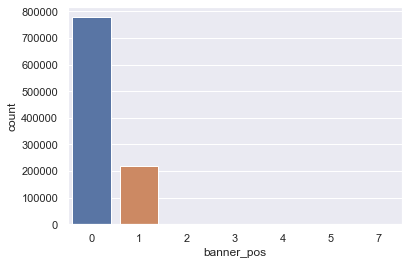

In [5]:
sns.countplot(train['banner_pos']) #广告位置
plt.show()#多数用户访问了0,1位置

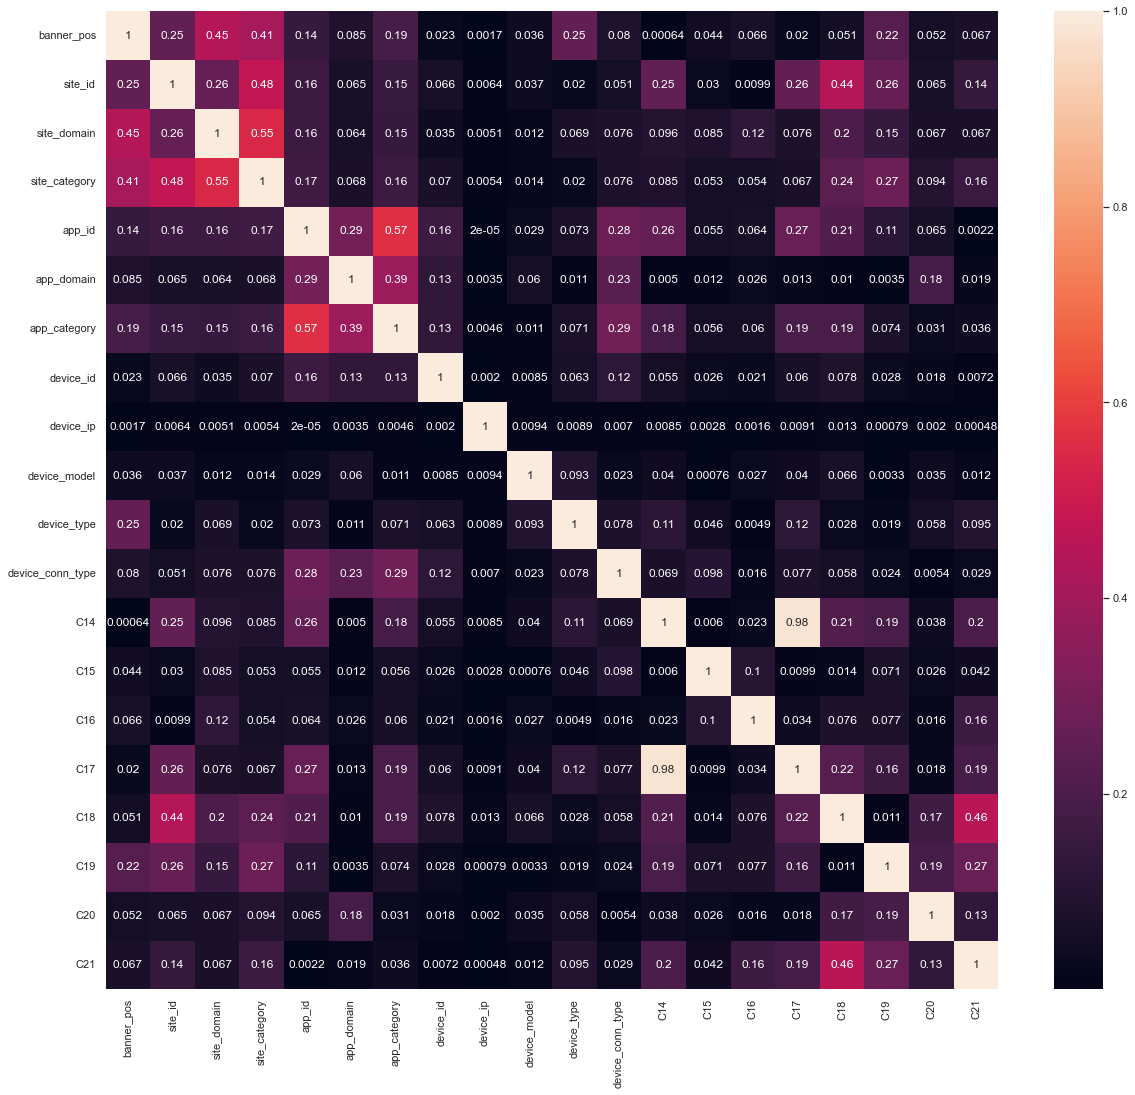

In [7]:
#相关性分析
for column in ['C1', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model']:
    enc = LabelEncoder()
    train[column] = enc.fit_transform(train[column])
    
sub_train = train.iloc[:, 4:]
plt.figure(figsize=(20, 18))
sns.heatmap(sub_train.corr().abs(), annot=True)
plt.show()
